# Hello ~World~ Transformers

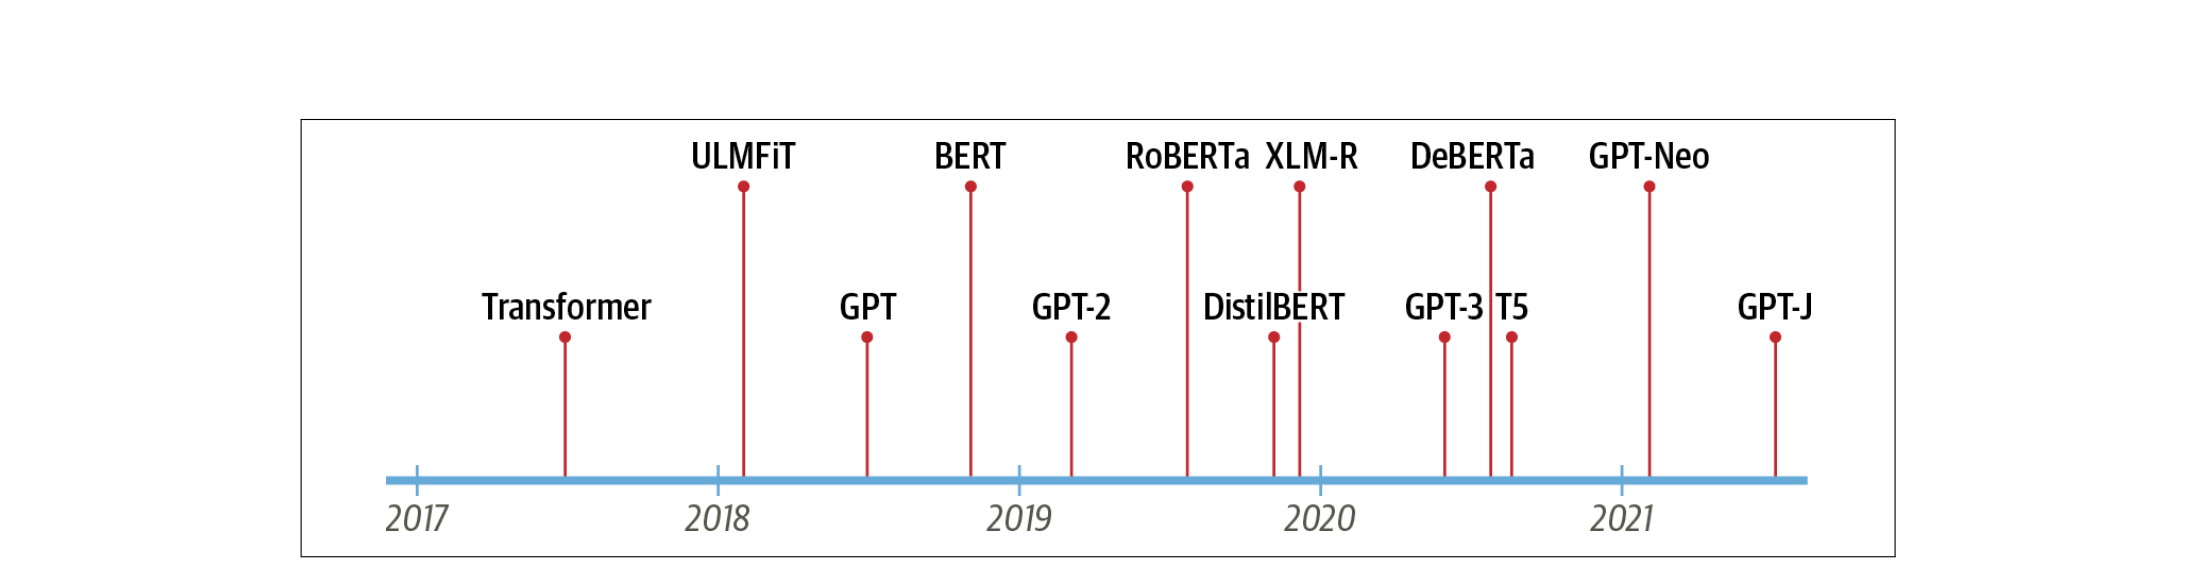

### Transfer Learning in NLP

- This allows the network to make use of the knowledge learned
from the original task
- Architecturally, this involves splitting the model into of a body
and a head, where the head is a task-specific network

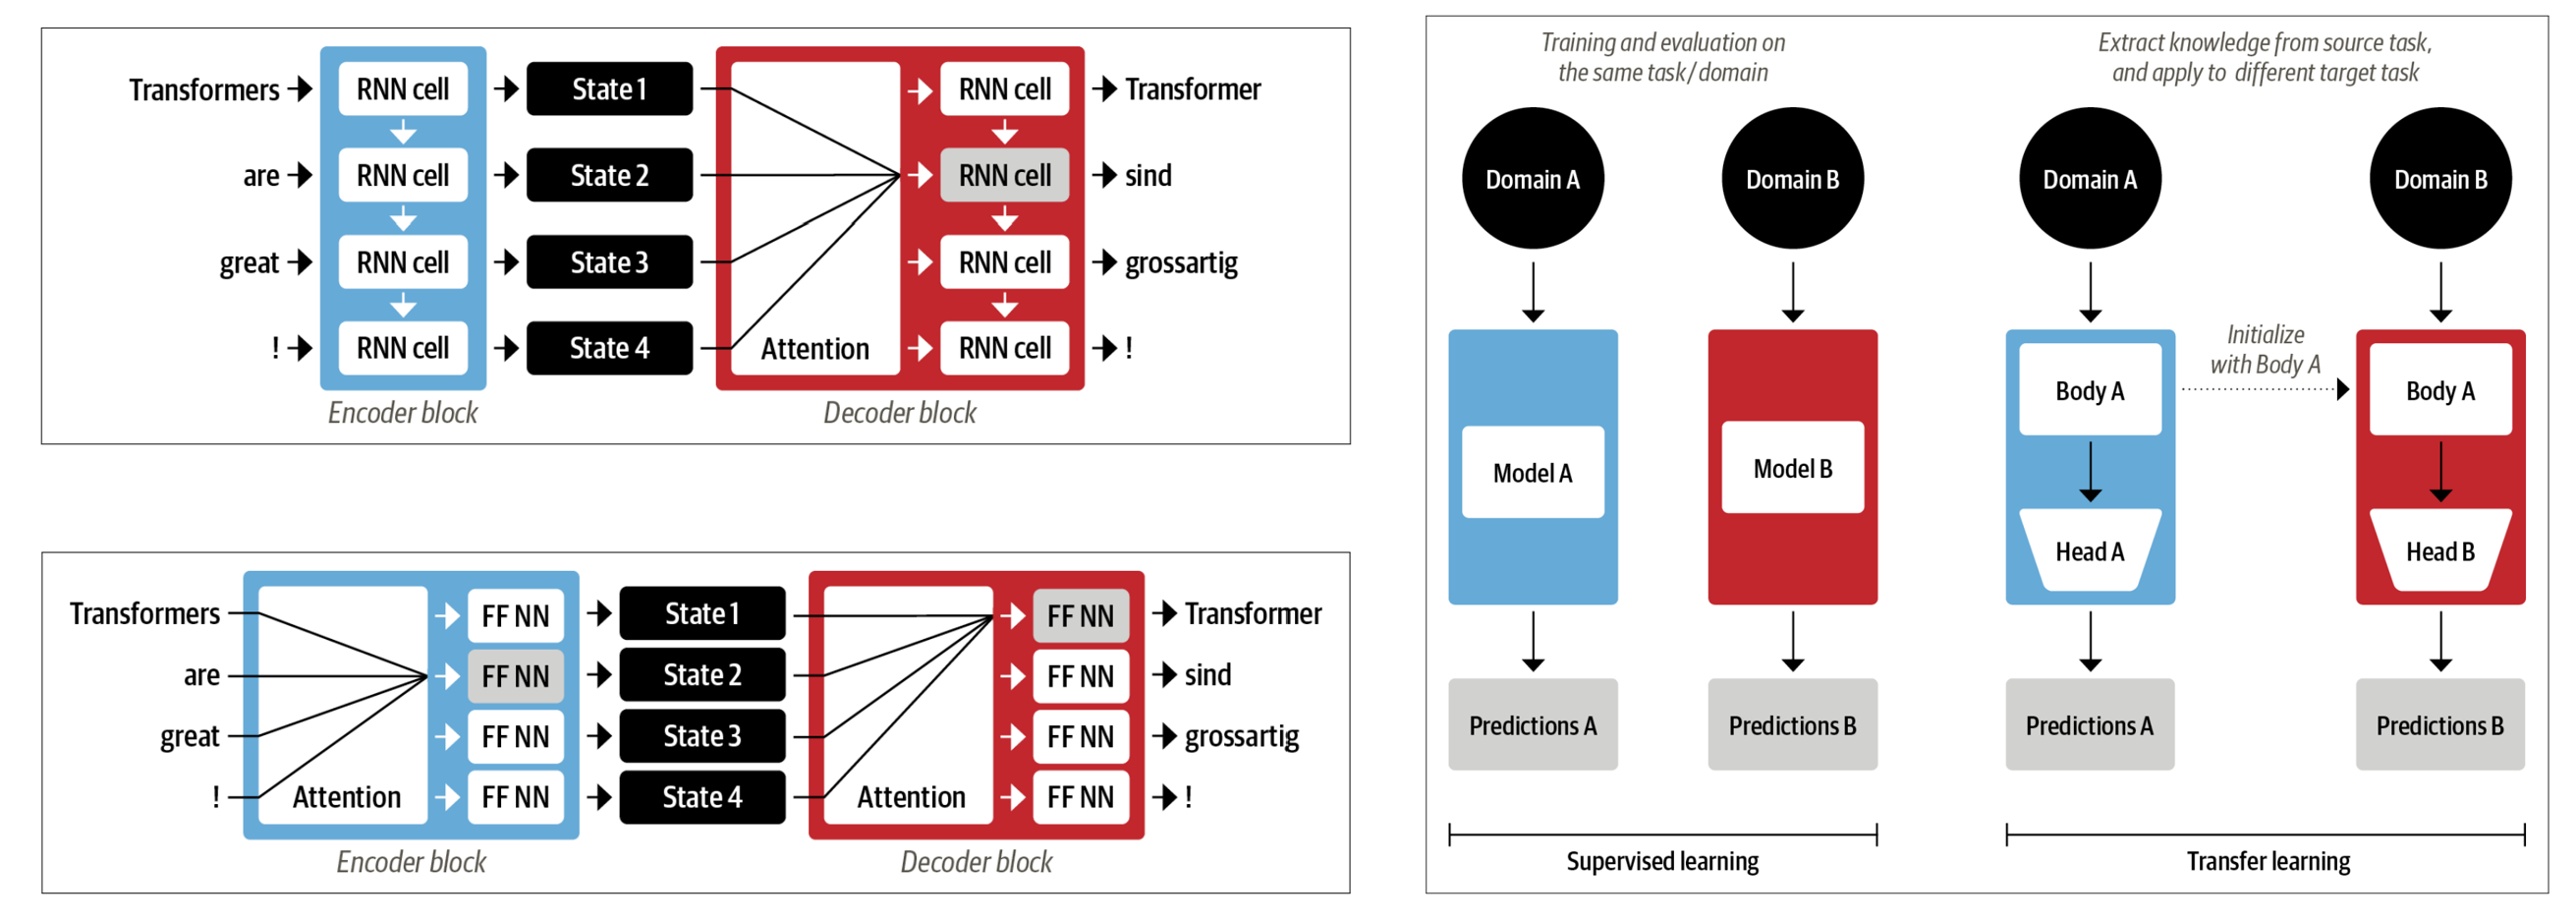

## Transformer Applications

https://huggingface.co/docs/transformers/v4.35.0/en/quicktour#pipeline

- Text Classification
- Named Entity Recognition (NER)
- Question Answering
- Summarization
- Translation
- Text Generation
- Image Generation
- Audio Generation
- Video Generation
- Mixing of Audio and Video

## Text Classification
https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english


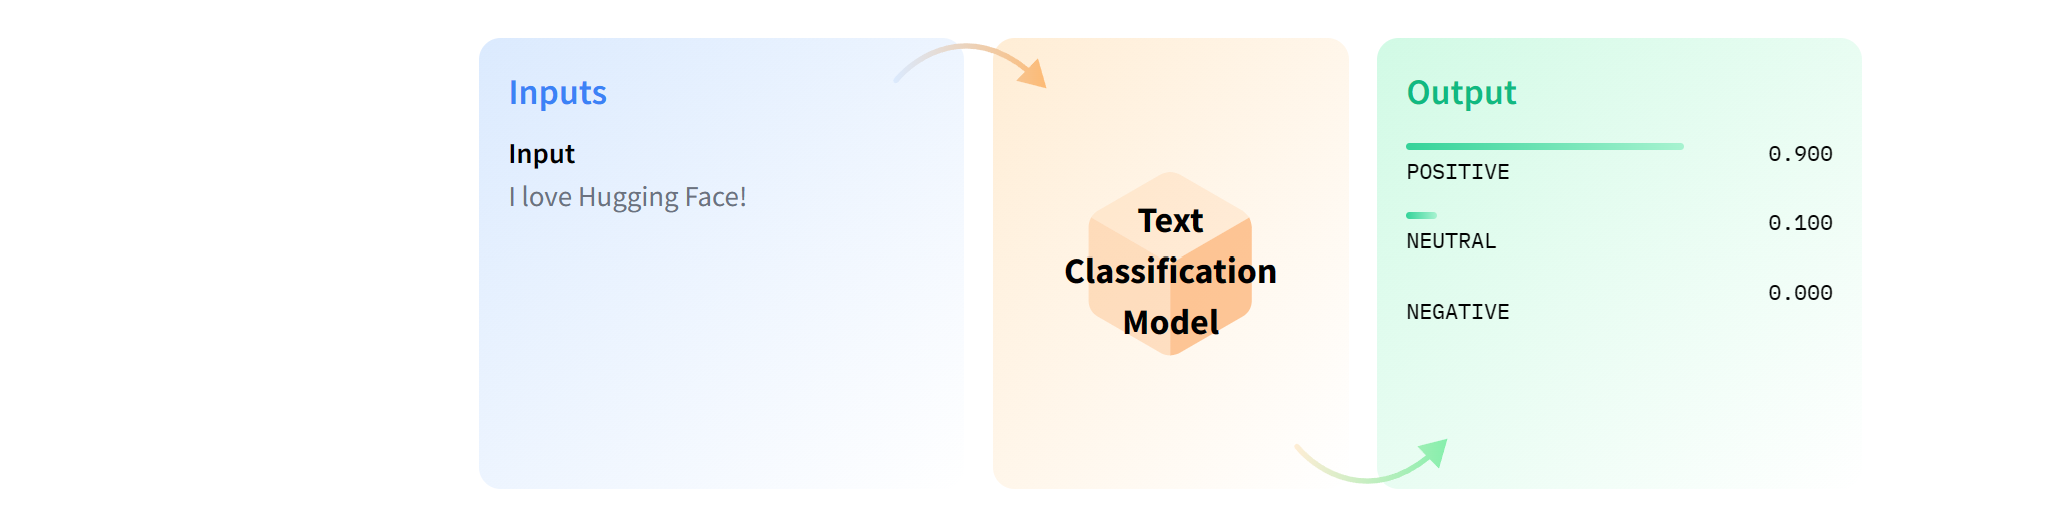

In [ ]:
!pip install -U transformers
!pip install -U sentencepiece
!pip install -U sacremoses

In [1]:
from transformers import pipeline
import pandas as pd

In [2]:
classifier = pipeline("text-classification", model = "SamLowe/roberta-base-go_emotions")

text = "wow! we have come across this far"
outputs = classifier(text)
pd.DataFrame(outputs)

Device set to use cpu


label     score
0  surprise  0.630752

## Named Entity Recognition

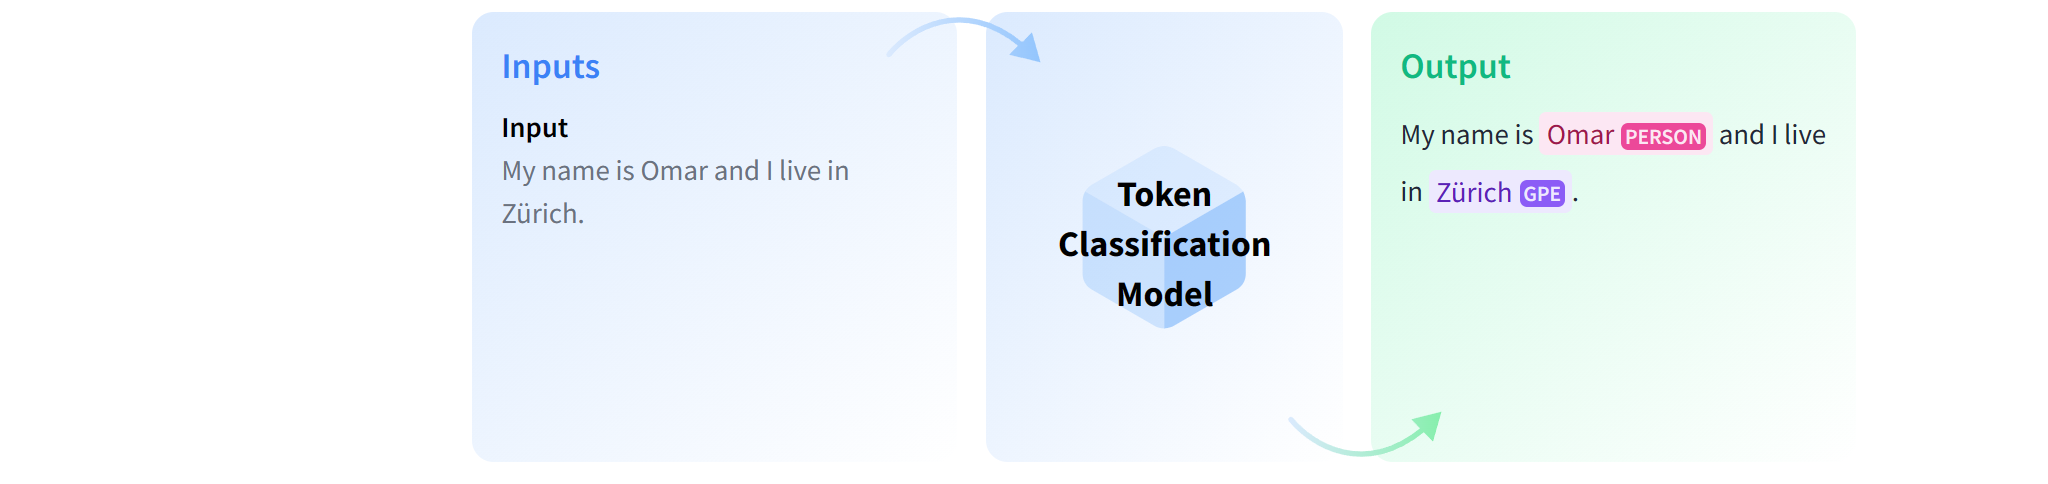

In [ ]:
ner_tagger = pipeline("ner", aggregation_strategy="simple", model="ml6team/keyphrase-extraction-kbir-inspec")
text = "Keyphrase extraction is a technique in text analysis where you extract the important keyphrases from a document.  Thanks to these keyphrases humans can understand the content of a text very quickly and easily without reading  it completely. "

outputs = ner_tagger(text)
pd.DataFrame(outputs)

entity_group     score                   word  start  end
0          KEY  0.999996   Keyphrase extraction      0   20
1          KEY  0.999992          text analysis     39   52

## Question Answering

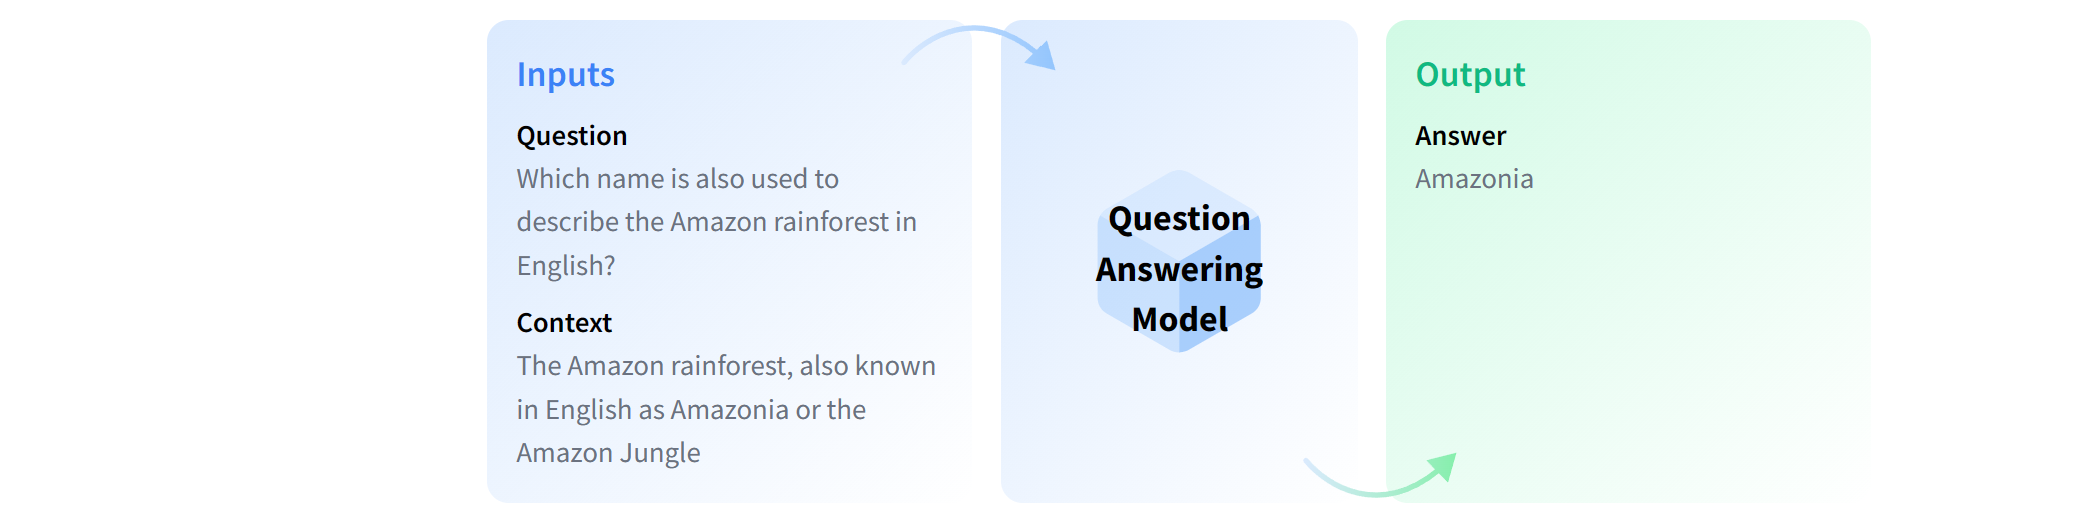

In [ ]:
text = """
Dear Amazon, last week I ordered an Optimus Prime action figure from your
online store in India. Unfortunately when I opened the package, I discovered to
my horror that I had been sent an action figure of Megatron instead!
"""

reader = pipeline("question-answering")
question = "from where did I placed order?"

outputs = reader(question=question, context=text)
pd.DataFrame([outputs])

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


score  start  end                 answer
0  0.311906     75   96  online store in India

## Summarization

In [ ]:
text

'\nDear Amazon, last week I ordered an Optimus Prime action figure from your\nonline store in India. Unfortunately when I opened the package, I discovered to \nmy horror that I had been sent an action figure of Megatron instead!\n'

In [ ]:
summarizer = pipeline("summarization")

outputs = summarizer(text)
outputs

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Your max_length is set to 142, but your input_length is only 52. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=26)


[{'summary_text': ' Amazon sent an Optimus Prime action figure from your online store in India . Unfortunately when I opened the package, I discovered to  horror that I had been sent an action figure of Megatron instead! Amazon.com.com: "I was sent a Megatron action figure instead of Optimus Prime."'}]

In [ ]:
outputs[0]['summary_text'][len(text):]

'sent a Megatron action figure instead of Optimus Prime."'

## Translation

In [ ]:
translator = pipeline("translation_en_to_de", model="Helsinki-NLP/opus-mt-en-de")

outputs = translator(text)
outputs

config.json:   0%|          | 0.00/1.33k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/298M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/768k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/797k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.27M [00:00<?, ?B/s]

[{'translation_text': 'Sehr geehrter Amazon, letzte Woche habe ich eine Optimus Prime Action Figur in Ihrem Online-Shop in Indien bestellt. Leider als ich das Paket öffnete, entdeckte ich zu meinem Entsetzen, dass ich stattdessen eine Action Figur von Megatron geschickt worden war!'}]

In [ ]:
translator = pipeline(model="Helsinki-NLP/opus-mt-en-hi")

outputs = translator(text)
outputs

config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/306M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/812k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/1.07M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.10M [00:00<?, ?B/s]

[{'translation_text': 'Mermam, पिछले सप्ताह मैंने भारत में आपके ऑनलाइन स्टोर से एक ऑडरिक कार्रवाई की आदेश दिया. दुर्भाग्य से जब मैंने पैकेज खोला था, तो मुझे लगा कि मैं एक कार्य आकृति भेजा गया था.'}]

## Text Generation

In [ ]:
from transformers import set_seed
set_seed(0)

In [ ]:
text

'\nDear Amazon, last week I ordered an Optimus Prime action figure from your\nonline store in India. Unfortunately when I opened the package, I discovered to \nmy horror that I had been sent an action figure of Megatron instead!\n'

In [ ]:
generator = pipeline("text-generation", model="gpt2-large")

response = "I am sorry to hear that your order was mixed up"

# prompt = "user: " + text.replace("\n", " ") + " Customer Service Response: " + response

prompt = "There was a lion "
outputs = generator(prompt, max_length=128)

config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.25G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [ ]:
outputs

[{'generated_text': 'There was a lion \xa0on the ground next to the trail (at right). The trail turns up a short stairway that joins the trail below. At about 4:00 am, the trail comes out of the dense jungle forest and turns into a grassy, flat path flanked by a small stream. After a few more steps, there is a big grassy hill. The trail is not well marked. It might be a bit difficult to pick up. The view from the summit is spectacular with all of Mt. Rainier visible.\nAt the top, looking over Mount Rainier with the whole mountain above your head.'}]

## Image Classification

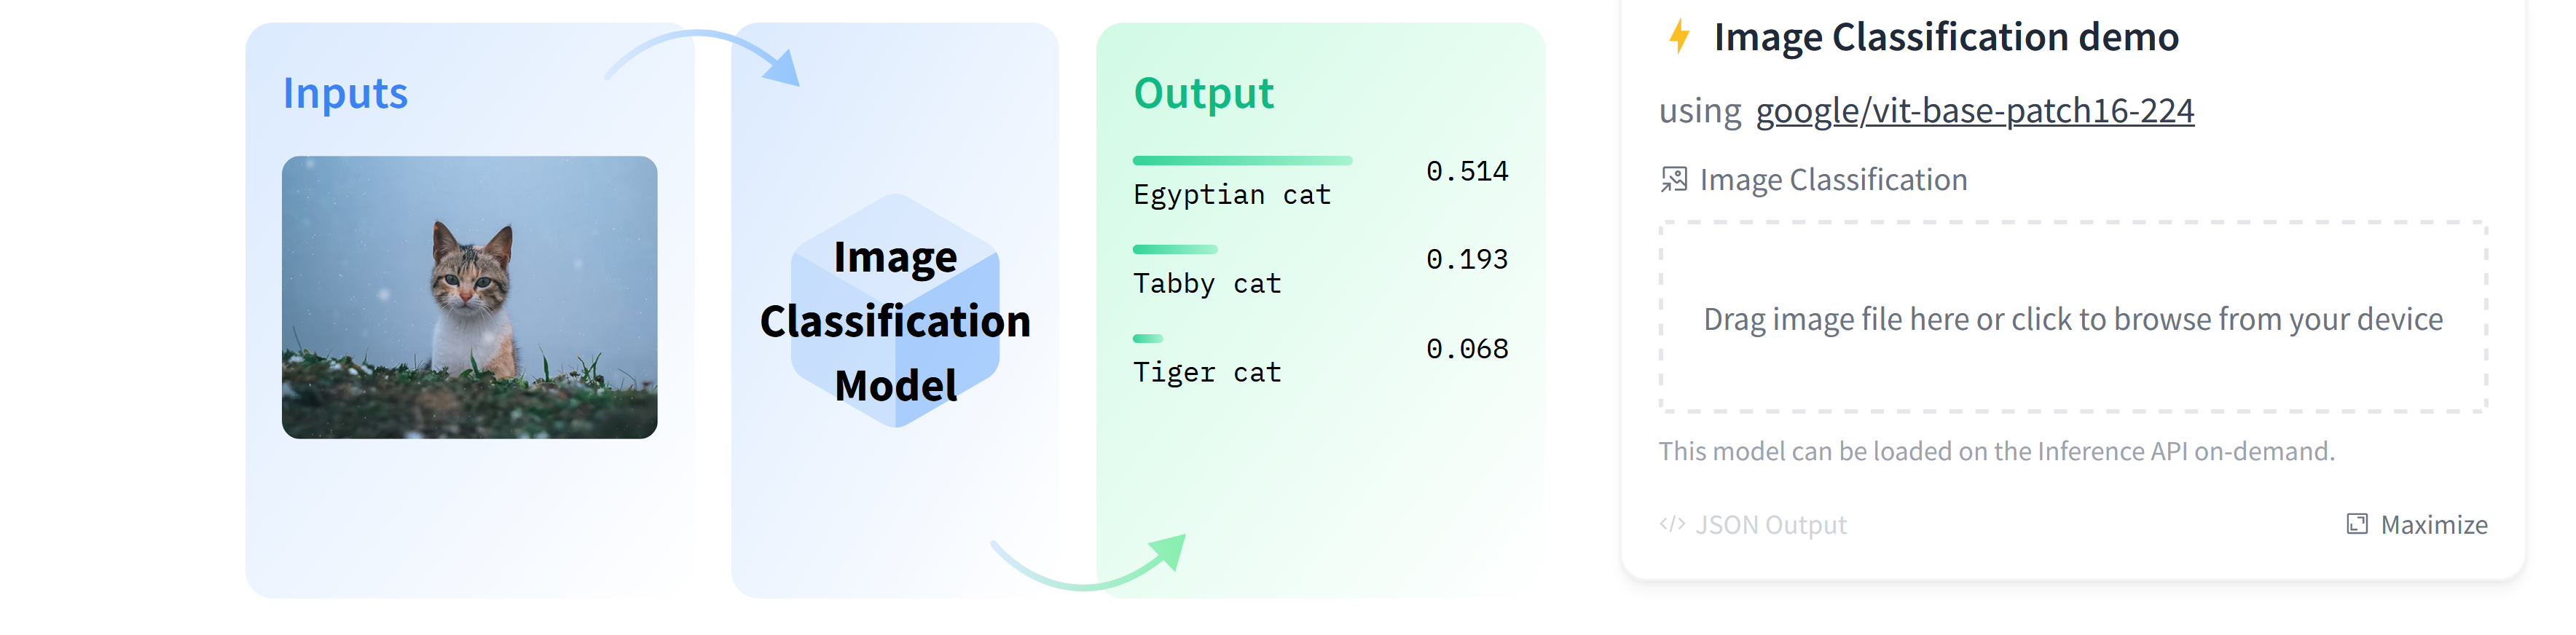

In [ ]:
from PIL import Image
import requests
from transformers import pipeline


In [ ]:
url = "https://res.cloudinary.com/dk-find-out/image/upload/q_80,w_1920,f_auto/DCTM_Penguin_UK_DK_AL697473_RGB_PNG_namnse.jpg"

image = Image.open(requests.get(url, stream=True).raw)

In [ ]:
classifier = pipeline("image-classification")

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 5dca96d (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
outputs = classifier(image)
outputs

[{'score': 0.9214932918548584, 'label': 'Egyptian cat'},
 {'score': 0.05818342790007591, 'label': 'tabby, tabby cat'},
 {'score': 0.012602901086211205, 'label': 'tiger cat'},
 {'score': 0.003715858329087496, 'label': 'lynx, catamount'},
 {'score': 0.0003999790351372212, 'label': 'Siamese cat, Siamese'}]

In [ ]:
url = "https://img.freepik.com/free-photo/young-bearded-man-with-striped-shirt_273609-5677.jpg"

image = Image.open(requests.get(url, stream=True).raw)
classifier = pipeline("image-classification", model="nateraw/vit-age-classifier")

outputs = classifier(image)
outputs



config.json:   0%|          | 0.00/850 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/343M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/197 [00:00<?, ?B/s]

[{'score': 0.5545729994773865, 'label': '30-39'},
 {'score': 0.39218637347221375, 'label': '20-29'},
 {'score': 0.05055495351552963, 'label': '40-49'},
 {'score': 0.0014976911479607224, 'label': '10-19'},
 {'score': 0.0009426265023648739, 'label': '50-59'}]

## Image Segmentation

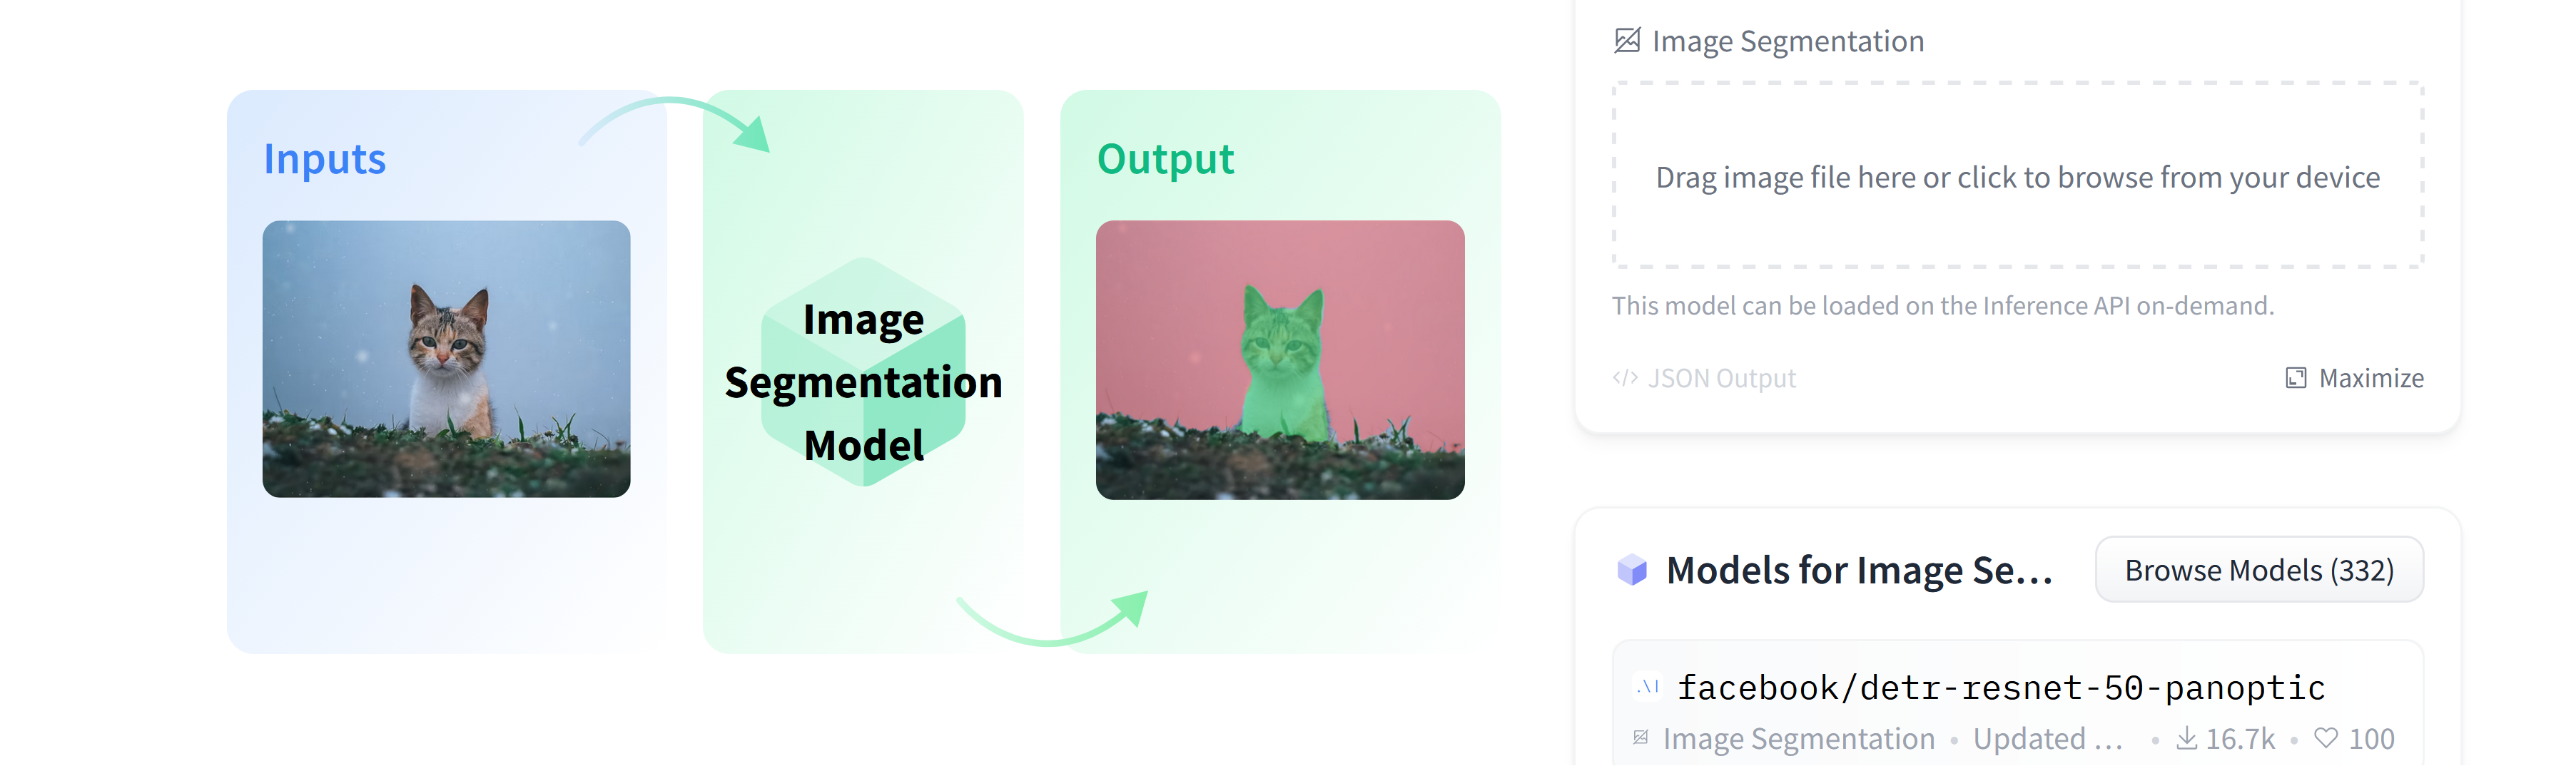

In [ ]:
url = "https://img.freepik.com/free-photo/young-bearded-man-with-striped-shirt_273609-5677.jpg"

image = Image.open(requests.get(url, stream=True).raw)

In [ ]:
segmenter = pipeline("image-segmentation", model="mattmdjaga/segformer_b2_clothes")
outputs = segmenter(image)

outputs

config.json:   0%|          | 0.00/1.73k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/109M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/271 [00:00<?, ?B/s]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
/usr/local/lib/python3.10/dist-packages/transformers/models/segformer/image_processing_segformer.py:101: FutureWarning: The `reduce_labels` parameter is deprecated and will be removed in a future version. Please use `do_reduce_labels` instead.
  warnings.warn(


[{'score': None,
  'label': 'Background',
  'mask': <PIL.Image.Image image mode=L size=626x417>},
 {'score': None,
  'label': 'Hair',
  'mask': <PIL.Image.Image image mode=L size=626x417>},
 {'score': None,
  'label': 'Upper-clothes',
  'mask': <PIL.Image.Image image mode=L size=626x417>},
 {'score': None,
  'label': 'Face',
  'mask': <PIL.Image.Image image mode=L size=626x417>}]

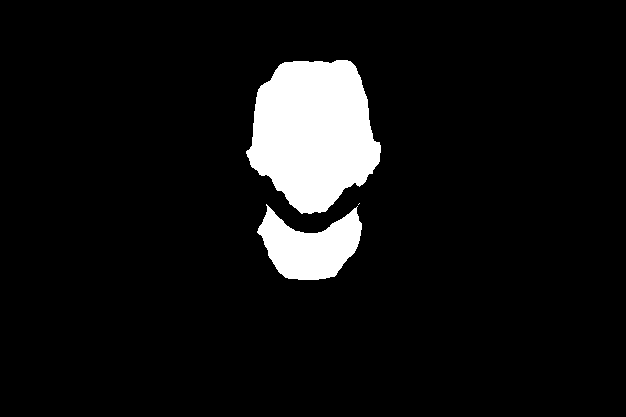

In [ ]:
outputs[3]['mask']

## Text to Speech

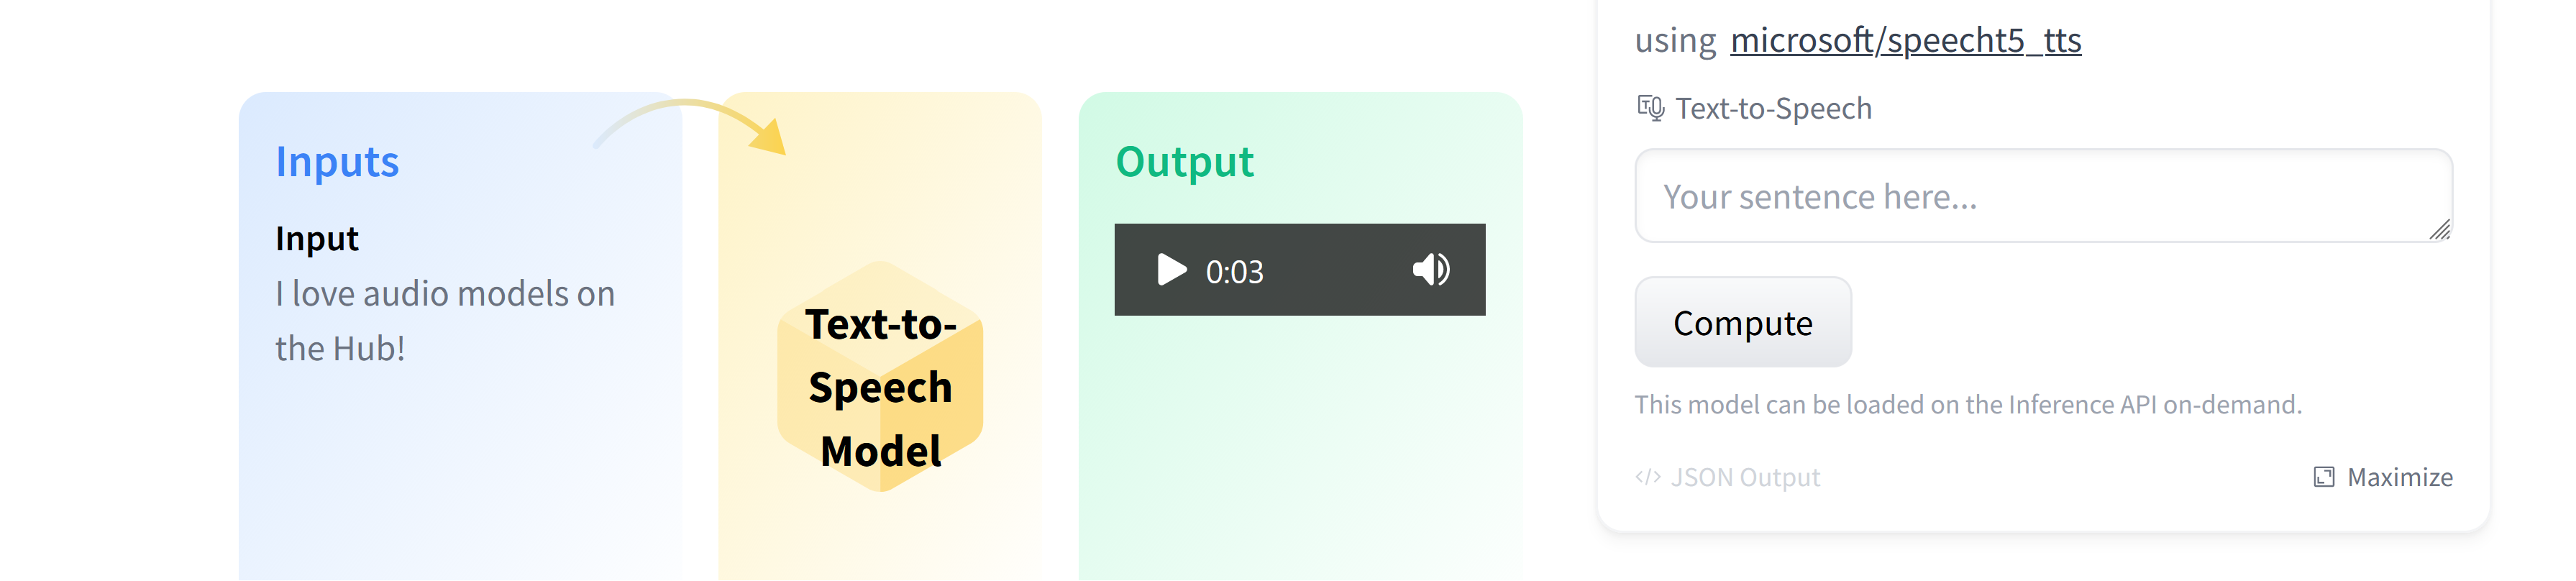

In [ ]:
import transformers
transformers.__version__

'4.35.2'

In [ ]:
import soundfile as sf

In [ ]:
text="""Sam Altman on Wednesday returned to OpenAI as the chief executive officer (CEO) and sacked the Board that had fired him last week. However, the only remaining member in the Board team is Adam D'Angelo, CEO of Quora.
Ex-Salesforce co-CEO Bret Taylor and former US Treasury Secretary and president of Harvard University, Larry Summers will join D'Angelo."""

In [ ]:
synth = pipeline("text-to-speech")

No model was supplied, defaulted to suno/bark-small and revision 645cfba (https://huggingface.co/suno/bark-small).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/8.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.68G [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/utils/weight_norm.py:30: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


generation_config.json:   0%|          | 0.00/4.91k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/353 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.92M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [ ]:
speech=synth(text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.


In [ ]:
speech

{'audio': array([[-0.17098364, -0.18613707, -0.1890971 , ...,  0.05270255,
          0.04265828,  0.04507708]], dtype=float32),
 'sampling_rate': 24000}

In [ ]:
sf.write("speech.wav", speech["audio"].T, samplerate=speech['sampling_rate'])

## Text to Music Generation

In [ ]:
synth = pipeline("text-to-audio", "facebook/musicgen-small")
text = "a chill song with influences from lofi, chillstep and downtempo"

music = synth(text, forward_params={"do_sample":True})


config.json:   0%|          | 0.00/7.87k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.36G [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/utils/weight_norm.py:30: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


generation_config.json:   0%|          | 0.00/224 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.37k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

Using the model-agnostic default `max_length` (=1500) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.


In [ ]:
# sf.write("music.wav",music["audio"].T, samplerate=music['sampling_rate'])
import scipy
scipy.io.wavfile.write("music.wav", rate=music["sampling_rate"], data=music['audio'])